# Assignment 1, Gradient Descent

 Brent Staab

In this first assignment, we are applying python code that performs gradient descent to fit several models to the air quality data discussed in the lecture during the first week.  

## Requirements

1. Implement (or copy from lecture notes if available) the following functions:

    * `linear_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an N x 1 numpy array of the linear model's predicted outputs for each sample in `X`.
        
    * `linear_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 2 x 1 numpy array of weight values, with the first weight being the bias, or y-intercept, weight
        * Return
            * an 2 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quadratic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 3 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, and the weight for `X**2` 
        * Return
            * an N x 1 numpy array of the quadratic model's predicted outputs for each sample in `X`.
        
    * `quadratic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 3 x 1 numpy array of weight values, ordered as for `quadratic_model`
        * Return
            * an 3 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.

    * `quartic_model(X, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `W`, a 5 x 1 numpy array of weight values, ordered as the bias weight, the weight for `X`, the weight for `X**2`, the weight for `X**3`, and the weight for `X**4`
        * Return
            * an N x 1 numpy array of the quartic model's predicted outputs for each sample in `X`.
        
    * `quartic_model_gradient(X, T, W)`:
        * Given
            * `X`, an N x 1 numpy array of input samples
            * `T`, an N x 1 numpy array of correct outputs for each input sample
            * `W`, a 5 x 1 numpy array of weight values, ordered as for `quartic_model`
        * Return
            * an 5 x 1 numpy array of the gradient of the mean squared error function with respect to each weight.


2. Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. This is a little different than what was done in class. Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

3. Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph.  All of this is illustrated here using a `cubic_model`.  Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error.  Do not change the number of iterations steps.  Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.


## Import code needed in this notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

## 1) Implement functions

### Linear Functions

In [2]:
def linear_model(X, W):
    # W is column vector
    return X @ W[1:, :] + W[0,:]

In [3]:
def linear_model_gradient(X, T, W):
    dEdY = -2 * (T - linear_model(X, W))
    dYdW = np.insert(X, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Linear Function Verification

In [4]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)

In [5]:
#linear_model(X, W)

### Quadratic Functions

In [6]:
def quadratic_model(X, W):
    # W is column vector
    n_columns = X.shape[1]
    linear_part = X @ W[1:n_columns + 1, :] + W[0,:]
    nonlinear_part = X**2 @ W[n_columns + 1:n_columns + 2, :]
    return nonlinear_part + linear_part

In [7]:
def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    linear_part = np.insert(X, 0, 1, axis=1)
    nonlinear_part = X**2
    dYdW = np.hstack((linear_part, nonlinear_part))
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Quadratic Function Verification

### Cubic Functions

In [8]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

In [9]:
def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Cubic Function Verification

### Quartic Functions

In [10]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:, :] + W[0, :]

In [11]:
def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

##### Quartic Function Verification

In [12]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)

In [13]:
grad = quartic_model_gradient(X, T, W)
#error_sequence[-1]

#### Helper & common functions

In [14]:
def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

In [15]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps=1):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

### Example from jupyter notebook

In [16]:
X = np.array([0.1, 0.4, 0.7]).reshape(-1, 1)
T = np.array([2.0, 1.0, 8.0]).reshape(-1, 1)
W = np.array([2.0, 1.0, -0.5, 0.3]).reshape((-1, 1))

In [17]:
#cubic_model_gradient(X, T, W)
W = np.zeros((4, 1))
rho = 1.e-1
n_steps = 3000
W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

Final RMSE for rho 0.1 at step 3000 is 0.010134


In [18]:
W

array([[  3.32103393],
       [-14.55267253],
       [ 10.59310698],
       [ 28.20747846]])

### From grading assignment

In [19]:
X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
T = (((X - 5) * 0.05 +  (X * 0.2) **5) / 5.0 - 5.5) / 6
W = np.zeros((4, 1))

In [20]:
W, error_sequence, W_sequence = gradient_descent_adam(
       cubic_model, cubic_model_gradient, rmse, X, T, W, rho=1e-3, n_steps=10000)

In [21]:
error_sequence[-1]
#correct_err = 0.0184

0.016617411613005652

# Air Quality Data

Download and prepare the data.  The process is slightly modified from what we did in lecture.  Only using the first 46 samples (reduced to 43 after removing samples with missing values).

In [22]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1507k  100 1507k    0     0  2805k      0 --:--:-- --:--:-- --:--:-- 2802k
Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [23]:
# Read data from file, the file must be in same location as this notebook
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']] # Only get the Time and CO(GT) column data, discard the rest
data = data[:46]                # only use the first 46 samples
data = data.dropna(axis=0)      # axis=0 -> Drop rows which contain missing values

# Create numpy arrays for plotting.
# Extract and format the data of interest

# Get just the hour part of the time
hour = np.array([int(t[:2]) for t in data['Time']])

# Convert the pandas data into a numpy array
CO = np.array(data['CO(GT)'])

# Make sure the data is in a single column ... variable_num_rows, 1 column
T = CO.reshape(-1, 1)
X = hour.reshape(-1, 1)

# Create labels for the data
Tnames = ['CO']
Xnames = ['Hour']

# Print debug info
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


## Plot `CO(GT)` air quality versus the hour of the day

Plot `CO(GT)` air quality versus the hour of the day to verify you have prepared the data correctly.

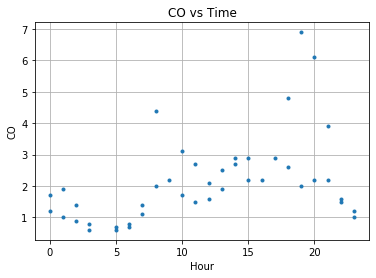

In [24]:
plt.plot(X, T, '.')       # Plot CO vs Time, each data point is identified as '.'
plt.grid(True)            # Display a grid on plot
plt.title('CO vs Time')   # Add plot title
plt.xlabel(Xnames[0])     # Add X-Axis label
plt.ylabel(Tnames[0])     # Add Y-Axis label
plt.show()                # Do this to suppress automatic plt text from last command run

Add code cells here to implement the linear, quadratic, cubic, and quartic models, and to fit the models to the air quality data.

Also add markdown cells that explain each result and summarize your observations of the plots.

Use the gradient_descent_adam function defined in the lecture notes to find the best weights for the linear model, as illustrated in lecture. Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the linear model on the same graph. All of this is illustrated here using a cubic_model. Once this is working, copy and paste the code cells for each model and train each model with at least five different learning rates, from 1.e-2, to 1.e-10 to find rates that result in the lowest error. Do not change the number of iterations steps. Include the code and results for each. Discuss in markdown cells the best learning rate values and errors you get for each model.

In [28]:
# Function to create a set of plots for a given model and data set
def plot_data(Model_Name, learning_rate, error_seq, w_seq, X, T, model_output):
    plt.figure(figsize=(20, 5))
    #---------------------------------------------------------------------------------
    title = 'Model ({}), learning rate({})'.format(Model_Name, learning_rate)
    plt.suptitle(title, fontsize=14)
    #---------------------------------------------------------------------------------
    plt.subplot(1, 3, 1)                        # First plot
    plt.plot(error_sequence)                    # Add data to plot
    plt.grid(True)                              # Display a grid on plot
    plt.title('RMSE vs Iterations')             # Add plot title
    plt.xlabel('Iteration')                     # Add X-Axis label
    plt.ylabel('RMSE')                          # Add Y-Axis label
    #---------------------------------------------------------------------------------
    plt.subplot(1, 3, 2)                        # Second plot
    plt.plot(W_sequence)                        # Add data to plot
    plt.grid(True)                              # Display a grid on plot
    plt.title('Weights vs Iterations')          # Add plot title
    plt.xlabel('Iteration')                     # Add X-Axis label
    plt.ylabel('Weight')                        # Add Y-Axis label
    #---------------------------------------------------------------------------------
    #plot the air quality versus hour of the day again and superimpose the linear model
    plt.subplot(1, 3, 3)                        # Third plot
    plt.plot(X, T, 'o')                         # Plot the air quality vs hr of day
    xs = np.linspace(0, 12, 300).reshape(-1, 1) #
    #plt.plot(xs, cubic_model(xs, W));           #
    plt.plot(xs, model_output);           #
    plt.grid(True)                              # Display a grid on plot
    plt.title('Air quality vs Hour of Day')     # Add plot title
    plt.xlabel('Hour of day')                   # Add X-Axis label
    plt.ylabel('Air quality')                   # Add Y-Axis label
    #---------------------------------------------------------------------------------

In [26]:
# Function to train a model and print the results
def train_models_and_print(model_name, model_f, model_gradient_f):
    learning_rates = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
    n_steps = 3000

    for rho in learning_rates:
        W = np.zeros((4, 1))
        ## linear - W = np.zeros((2, 1))
        W, error_sequence, W_sequence = gradient_descent_adam(model_f, model_gradient_f, rmse, X, T, W, rho, n_steps)
        print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')

        xs = np.linspace(0, 23, 300).reshape(-1, 1)
        md = model_f(xs, W)
        plot_data(model_name, rho, error_sequence, W_sequence, X, T, md)

Final RMSE for rho 0.01 at step 3000 is 1.041416
Final RMSE for rho 0.0001 at step 3000 is 1.070287
Final RMSE for rho 1e-06 at step 3000 is 1.339684
Final RMSE for rho 1e-08 at step 3000 is 1.561209
Final RMSE for rho 1e-10 at step 3000 is 1.594072


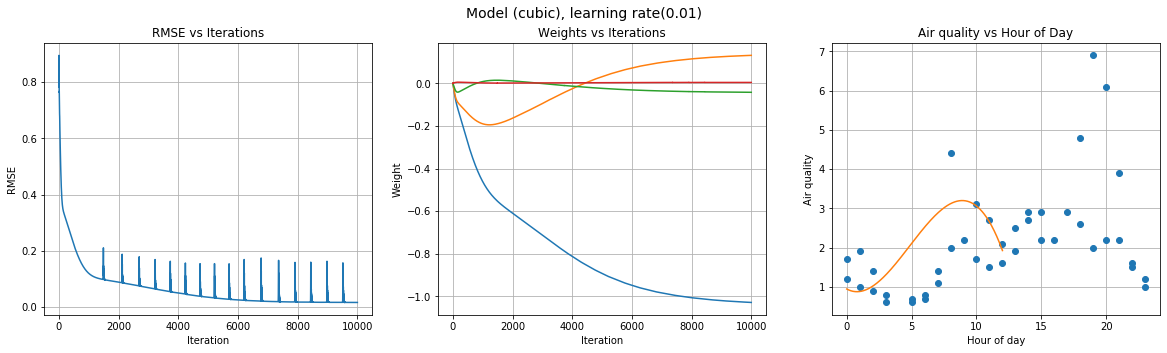

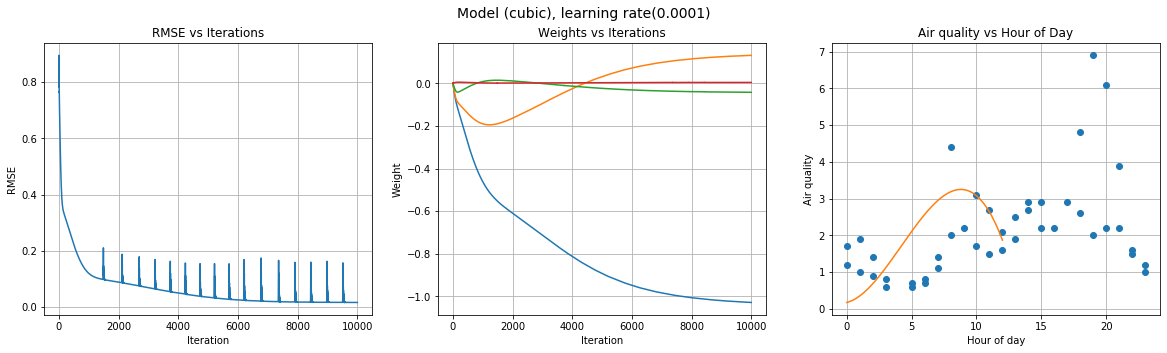

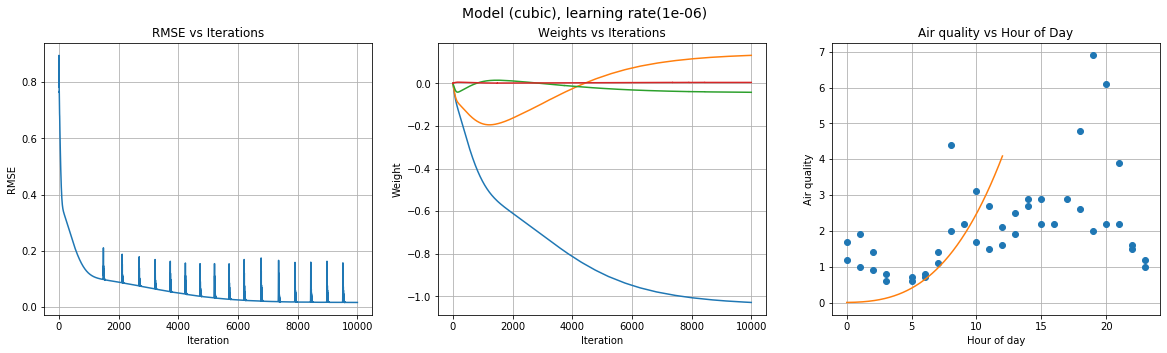

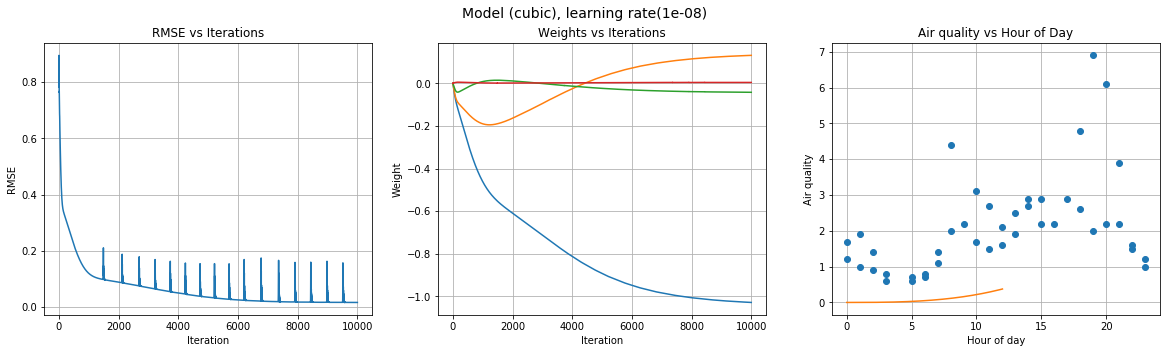

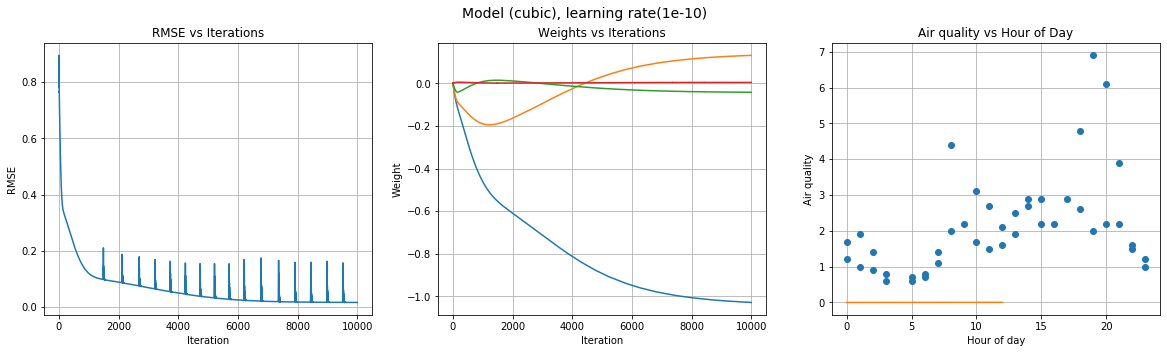

In [29]:
train_models_and_print("cubic", cubic_model, cubic_model_gradient)
#train_models_and_print("linear", linear_model, linear_model_gradient)

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [ ]:
%run -i A1grader.py

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.

## Extra Credit (1 point)

Write functions for a model and its gradient that is a linear (affine) function plus a sine function.  Repeat the above experiments with the air quality data using your new model. Include plots and explanations.